# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_spacedata = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_spacedata.shape
# 4,324 rows, 9 columns

(4324, 9)

In [6]:
df_spacedata.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [7]:
df_spacedata.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
cleaned_spacedata = df_spacedata.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cleaned_spacedata.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [9]:
cleaned_spacedata['Price'] = cleaned_spacedata['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # convert to float
cleaned_spacedata['Price'].isna().sum()

3360

In [10]:
cleaned_spacedata['Date'] = pd.to_datetime(cleaned_spacedata['Date'], format='mixed', utc=True) # convert into datetime obj
cleaned_spacedata['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

## Descriptive Statistics

In [11]:
cleaned_spacedata.describe()

Price
count   964.00
mean    153.79
std     288.45
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

In [12]:
cleaned_spacedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


<h2>Number of Launches by Organization</h2>
<p>Create a visulization for how many launches per org.</p>

In [13]:
launches_count = cleaned_spacedata['Organisation'].value_counts()
print(launches_count)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

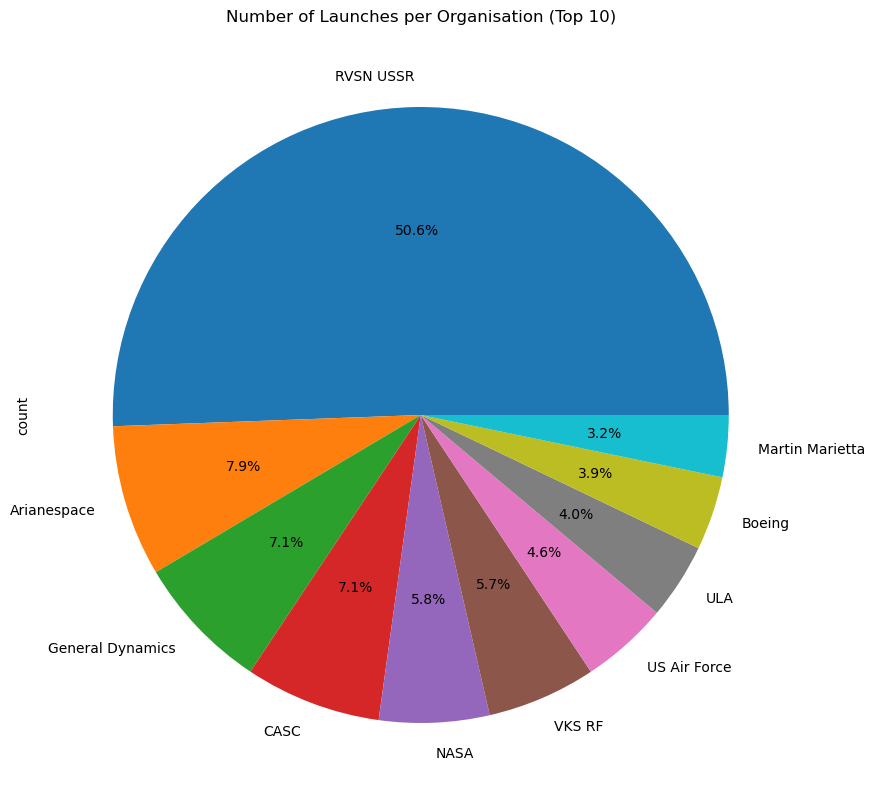

In [14]:
launches_count[:10].plot(
    kind='pie', 
    title='Number of Launches per Organisation (Top 10)',  
    figsize=(10,10),
    autopct='%1.1f%%'
)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [15]:
statuses = cleaned_spacedata['Rocket_Status']
inactive_rockets = cleaned_spacedata.loc[cleaned_spacedata['Rocket_Status'] == 'StatusRetired']
active_rockets = cleaned_spacedata.loc[cleaned_spacedata['Rocket_Status'] == 'StatusActive']
print(inactive_rockets.head())

    Organisation                                   Location  \
29           MHI     LA-Y2, Tanegashima Space Center, Japan   
64        VKS RF    Site 133/3, Plesetsk Cosmodrome, Russia   
98     Roscosmos  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
100          MHI     LA-Y2, Tanegashima Space Center, Japan   
105       VKS RF    Site 133/3, Plesetsk Cosmodrome, Russia   

                         Date  \
29  2020-05-20 17:31:00+00:00   
64  2019-12-26 23:11:00+00:00   
98  2019-09-25 13:57:00+00:00   
100 2019-09-24 16:05:00+00:00   
105 2019-08-30 14:00:00+00:00   

                                                Detail  Rocket_Status  Price  \
29                                       H-IIB | HTV-9  StatusRetired 112.50   
64   Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...  StatusRetired  41.80   
98                        Soyuz FG | Soyuz MS-15 (61S)  StatusRetired    NaN   
100                                      H-IIB | HTV-8  StatusRetired 112.50   
105                   

In [16]:
active_number = len(active_rockets)
retired_number = len(inactive_rockets)
print(f'Active Rockets: {active_number}, Retired Rockets: {retired_number}')

Active Rockets: 790, Retired Rockets: 3534


([<matplotlib.patches.Wedge at 0x146c23850>,
 [Text(0.9237255661164439, 0.5972696865762195, 'Active Rockets: 586'),
  Text(-0.9237256220368638, -0.5972696000907873, 'Retired Rockets: 378')],
 [Text(0.5038503087907875, 0.3257834654052106, '18.3%'),
  Text(-0.5038503392928347, -0.32578341823133855, '81.7%')])

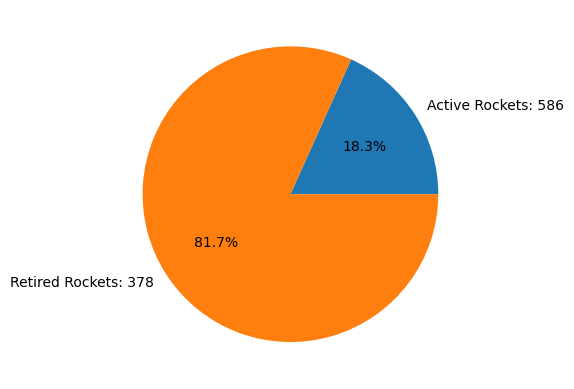

In [17]:
##Create a pie chart
labels = ['Active Rockets: 586', 'Retired Rockets: 378']
sizes = [active_number, retired_number]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_status_df = cleaned_spacedata['Mission_Status'].value_counts()
mission_status_df

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

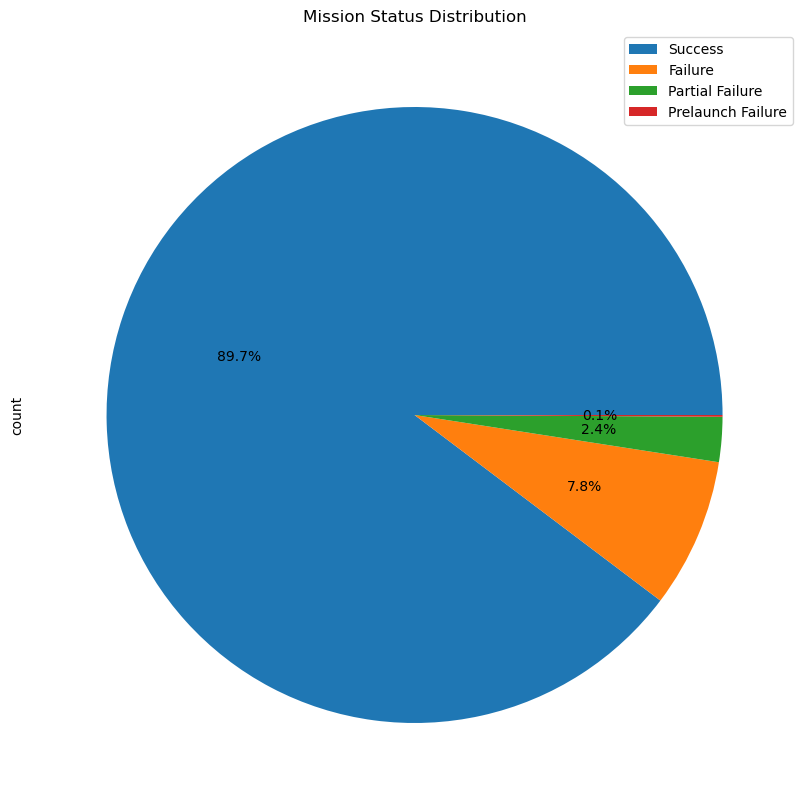

In [19]:
mission_status_df.plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    title='Mission Status Distribution',
    labels=None
)
plt.legend(labels=mission_status_df.index)
plt.show()

In [20]:
#About 95% successes (910), 5% various degrees of faliure (54)

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [21]:
prices_df = cleaned_spacedata['Price'].value_counts()
prices_df

Price
450.00      136
200.00       75
40.00        55
62.00        41
30.80        38
109.00       37
64.68        34
50.00        34
29.75        33
90.00        32
41.80        31
48.50        26
29.15        25
29.00        22
31.00        22
59.00        22
69.70        17
35.00        16
21.00        16
65.00        16
56.50        15
37.00        15
164.00       15
7.50         14
47.00        13
1,160.00     13
25.00        12
153.00       11
350.00       11
45.00        10
5.30          9
112.50        9
123.00        8
80.00         7
145.00        7
85.00         7
120.00        7
115.00        6
46.00         5
7.00          5
59.50         5
63.23         4
136.60        4
190.00        3
140.00        3
133.00        3
130.00        3
39.00         2
5,000.00      2
135.00        2
28.30         1
12.00         1
15.00         1
55.00         1
20.14         1
20.00         1
Name: count, dtype: int64

<Axes: title={'center': 'Mission Cost Distribution in Millions USD'}, ylabel='Frequency'>

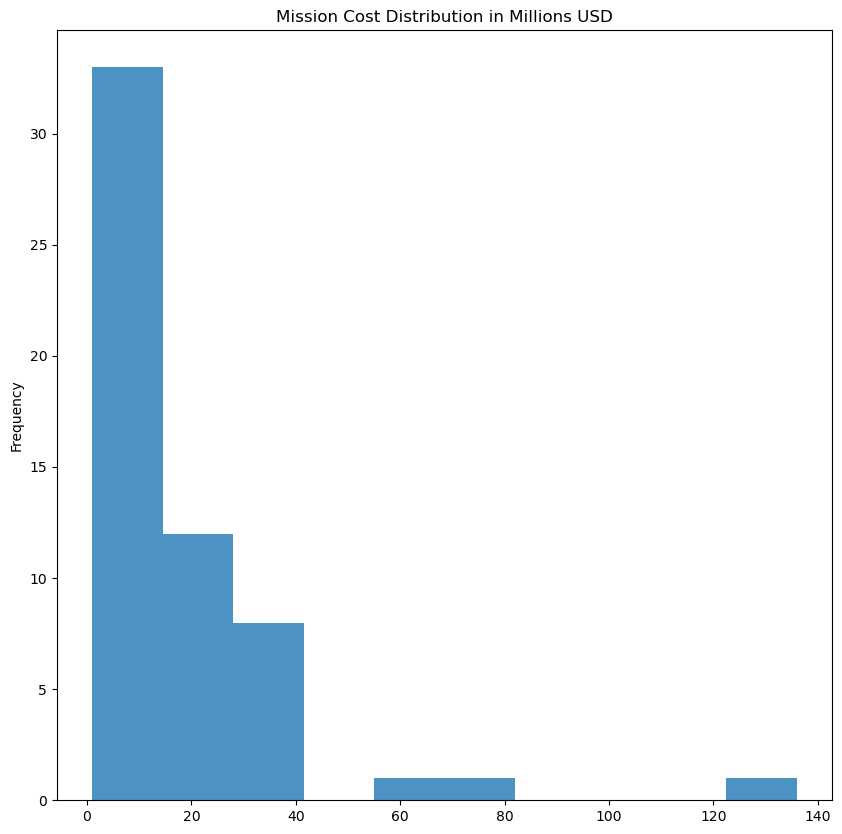

In [22]:
prices_df.plot(
    kind='hist',
    title='Mission Cost Distribution in Millions USD',
    figsize=(10,10),
    alpha=0.8)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
cleaned_spacedata['Country'] = cleaned_spacedata['Location'].apply(lambda x: x.split(',')[-1].strip())
cleaned_spacedata['Country'].value_counts()

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Iran                                13
New Zealand                         13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
Barents Sea                          3
Brazil                               3
South Korea                          3
Gran Canaria                         2
Shahrud Missile Test Site            1
Yellow Sea                           1
Pacific Missile Range Facility       1
Name: count, dtype: int64

In [24]:
#Replace country names with 3-letter code (ISO3166)
cleaned_spacedata['Country'].replace(
        {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    }, 
    inplace=True
)
cleaned_spacedata['Country'] = cleaned_spacedata['Country'].apply(lambda x: countries.get(x).alpha3)
launches_by_country = cleaned_spacedata['Country'].value_counts()

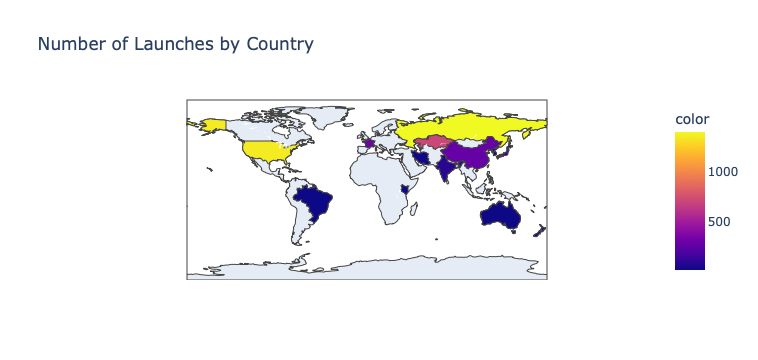

In [25]:
px.choropleth(
    launches_by_country,
    locations=launches_by_country.index,
    color=launches_by_country,
    title='Number of Launches by Country'
)

# Use a Choropleth Map to Show the Number of Failures by Country


In [26]:
failures_per_country = cleaned_spacedata[cleaned_spacedata['Mission_Status'] == 'Failure']['Country'].value_counts()

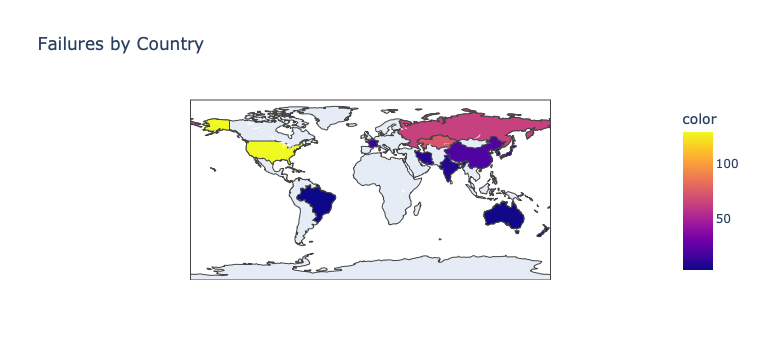

In [27]:
px.choropleth(
    failures_per_country,
    locations = failures_per_country.index,
    color= failures_per_country,
    title = 'Failures by Country'
)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

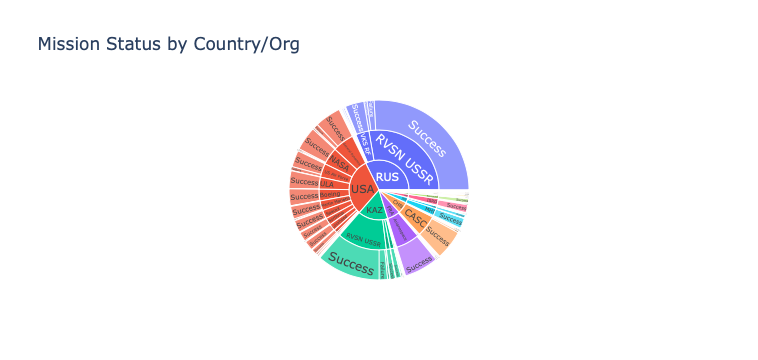

In [28]:
px.sunburst(cleaned_spacedata, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country/Org')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
total_spent_by_org = cleaned_spacedata.groupby('Organisation')['Price'].sum()
total_spent_by_org[total_spent_by_org != 0]

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

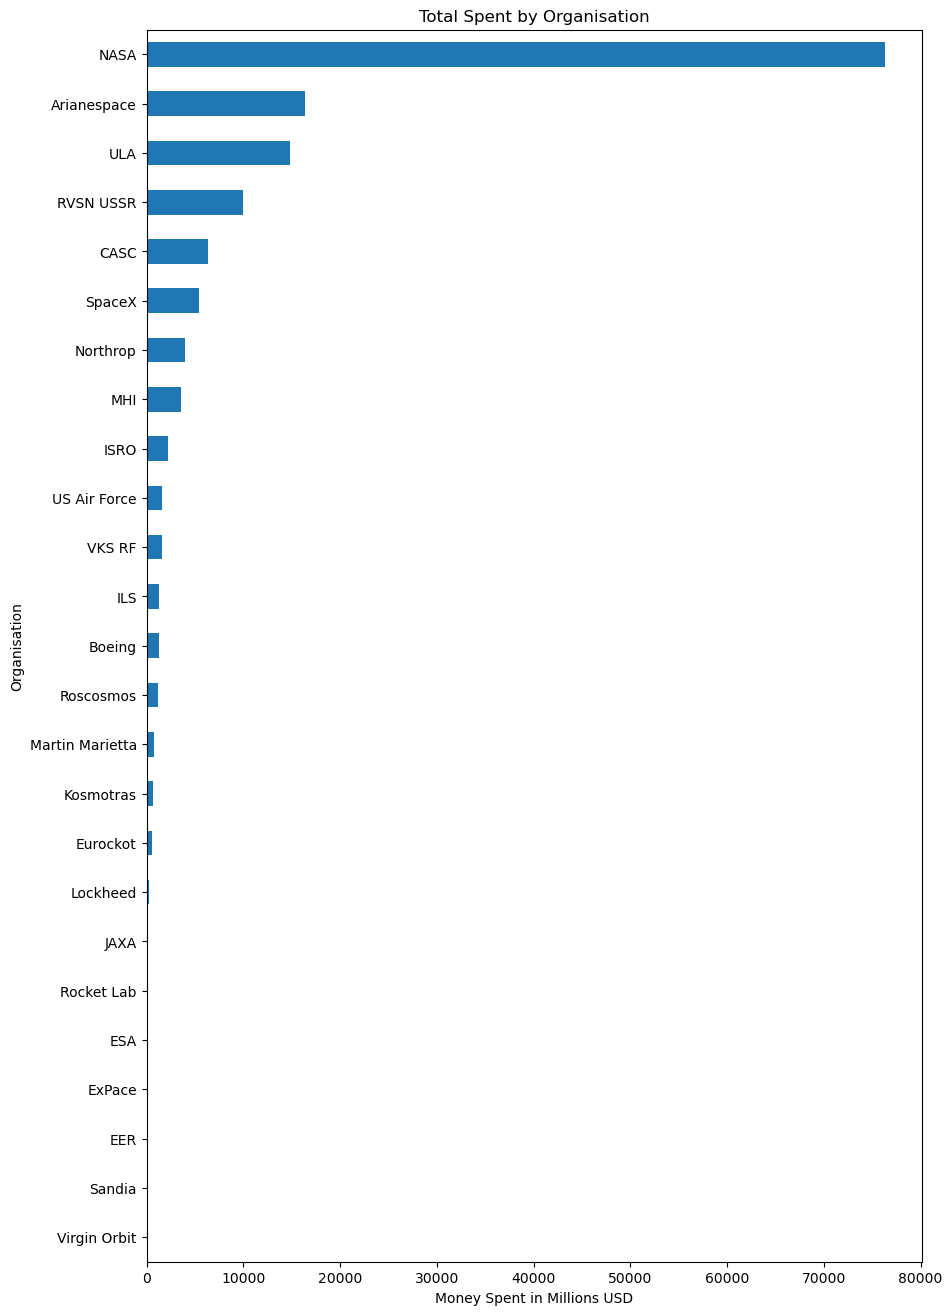

In [30]:
total_spent_by_org[total_spent_by_org != 0].sort_values().plot(
    kind='barh',
    title='Total Spent by Organisation',
    figsize=(10,16)
)
plt.xlabel('Money Spent in Millions USD')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [31]:
avg_spent = cleaned_spacedata.groupby('Organisation').agg({'Price' : np.mean})
avg_spent.dropna()

/var/folders/yf/qf0czm8j11s7drlcbn9_1mfm0000gn/T/ipykernel_36236/3538320358.py:1: FutureWarning:

The provided callable <function mean at 0x10e0c7a60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Price
Organisation            
Arianespace       170.26
Boeing            177.29
CASC               40.13
EER                20.00
ESA                37.00
Eurockot           41.80
ExPace             28.30
ILS               101.54
ISRO               32.49
JAXA               56.00
Kosmotras          29.00
Lockheed           35.00
MHI                95.47
Martin Marietta    80.16
NASA              511.95
Northrop           47.35
RVSN USSR       5,000.00
Rocket Lab          7.50
Roscosmos          51.63
Sandia             15.00
SpaceX             54.99
ULA               151.00
US Air Force       59.65
VKS RF             46.94
Virgin Orbit       12.00

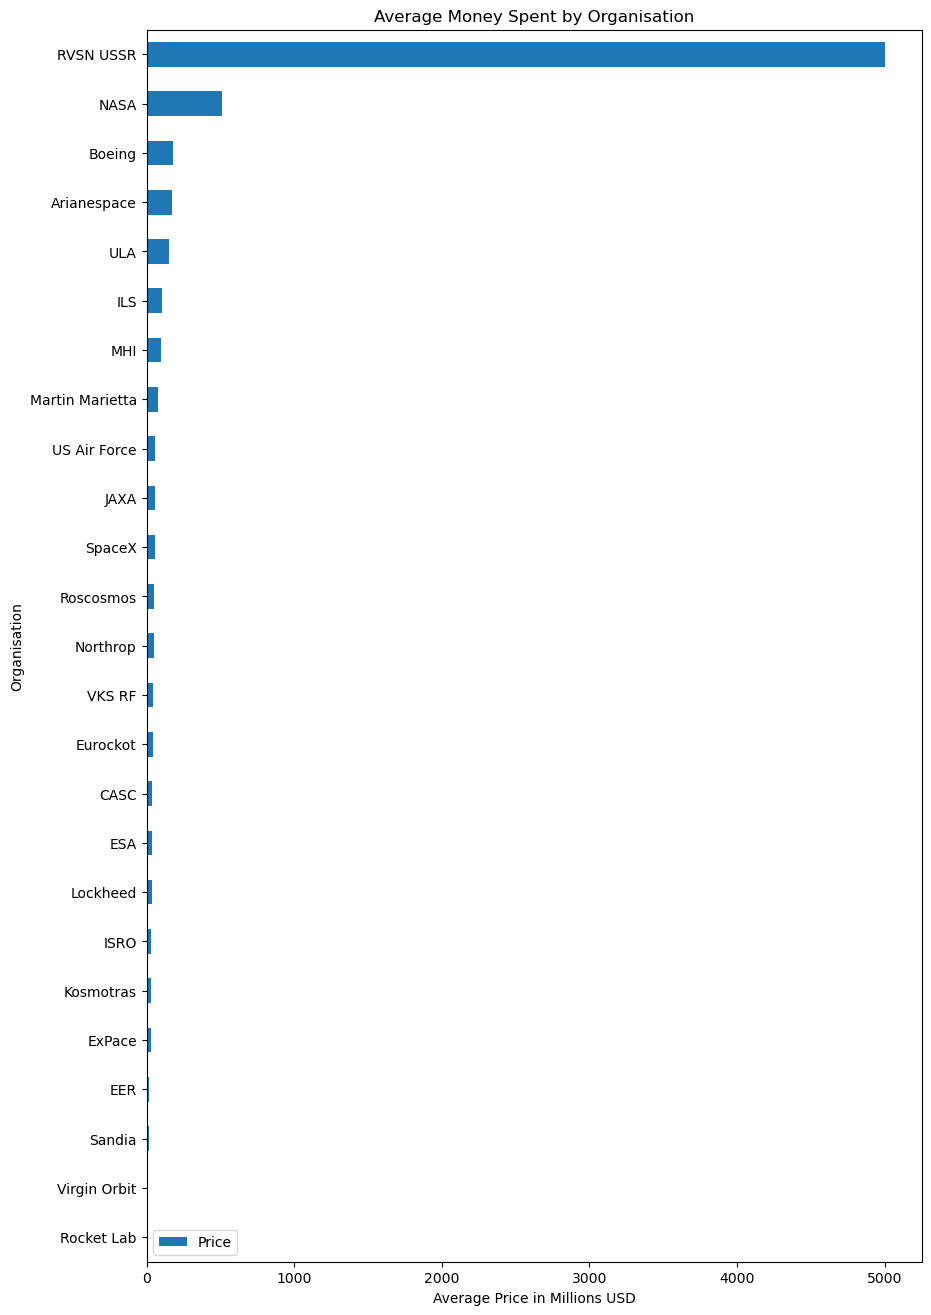

In [32]:
avg_spent.dropna().sort_values('Price').plot(
    kind='barh',
    figsize=(10,16),
    title='Average Money Spent by Organisation'
)
plt.xlabel('Average Price in Millions USD')
plt.show()

# Chart the Number of Launches per Year

In [33]:
cleaned_spacedata['Year'] = cleaned_spacedata['Date'].dt.year
launches_per_year = cleaned_spacedata.groupby('Year')['Detail'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

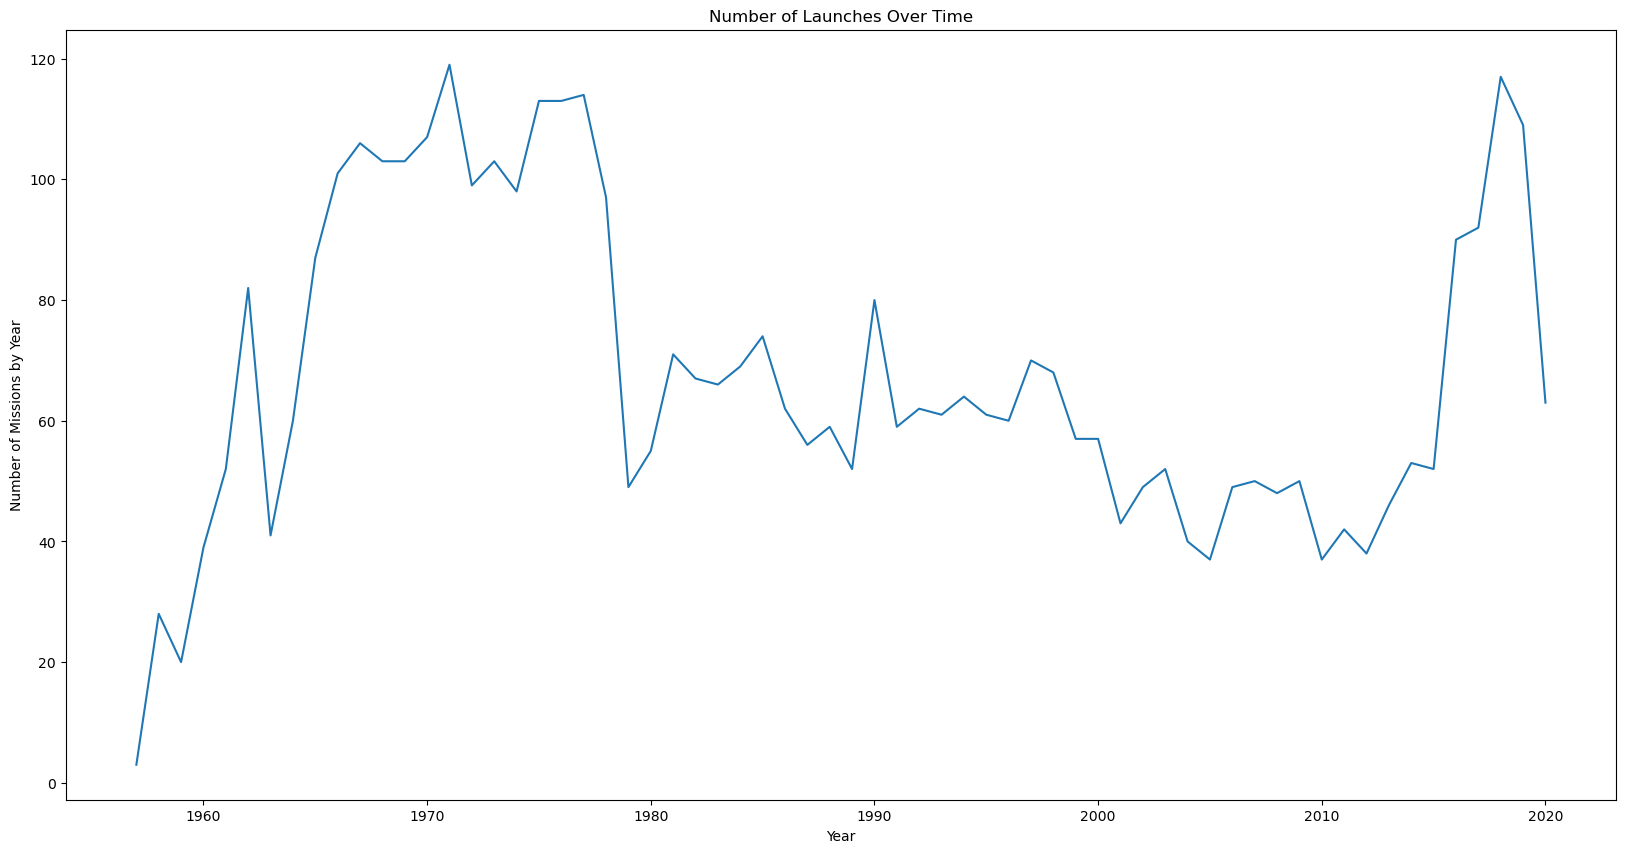

In [34]:
launches_per_year.plot(
    title='Number of Launches Over Time',
    figsize=(20,10)
)
plt.ylabel('Number of Missions by Year')
plt.show()

In [35]:
#Highest number of rocket launches around 1970 and 2018

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [36]:
launches_per_month = cleaned_spacedata.groupby(cleaned_spacedata['Date'].dt.month)['Detail'].count()
launches_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

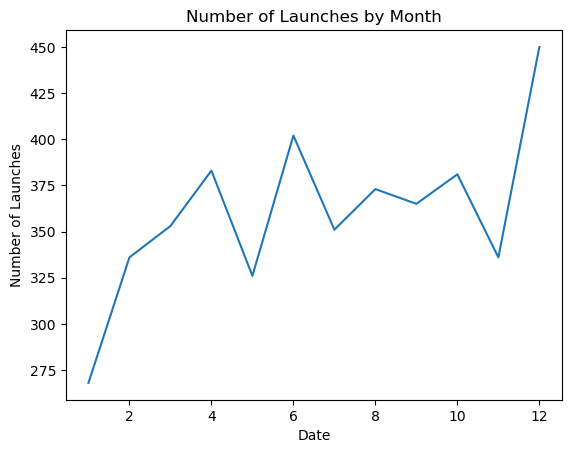

In [37]:
plt.figsize = (20, 10)
launches_per_month.plot(title='Number of Launches by Month')

plt.ylabel('Number of Launches')
plt.show()

In [38]:
##Looks like December and June are the busiest months for launches

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [39]:
##December and June are most popular

In [40]:
launches_per_month[launches_per_month == launches_per_month.min()]

Date
1    268
Name: Detail, dtype: int64

In [41]:
##January least popular month for rocket launches

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [42]:
price_over_time = cleaned_spacedata.dropna().groupby('Date')['Price'].mean()
rolling_average = price_over_time.rolling(30).mean()

<Axes: title={'center': 'Avg Price per Launch over Time'}, xlabel='Date'>

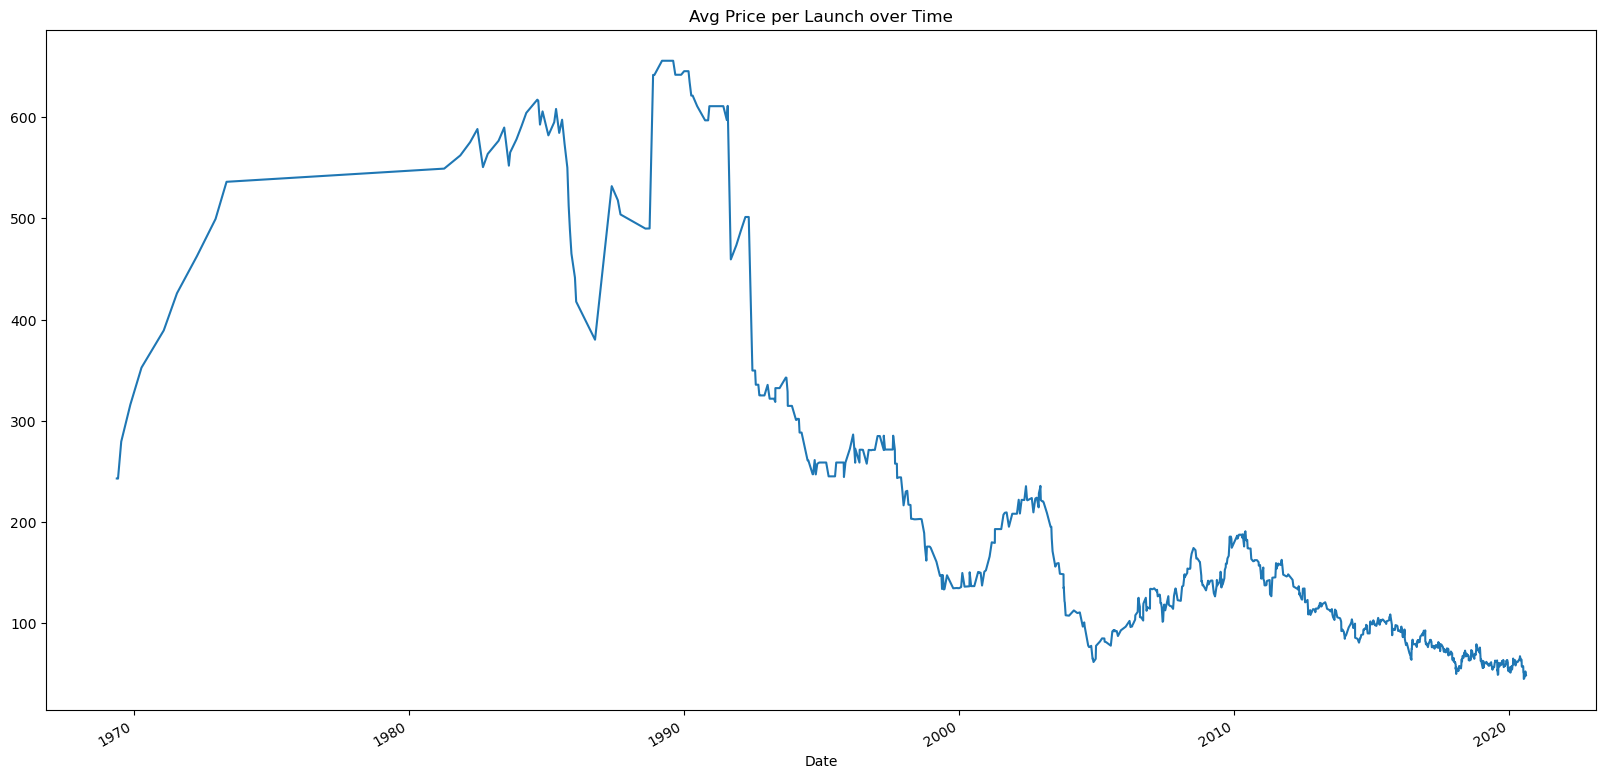

In [43]:
rolling_average.plot(
    figsize = (20,10),
    title = 'Avg Price per Launch over Time'
)

In [44]:
##Data show rocket launches have become cheaper over time (or organizations just spend less...?)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [45]:
top_10_orgs = cleaned_spacedata['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()

In [46]:
launches_top_10 = cleaned_spacedata[cleaned_spacedata['Organisation'].isin(top_10_orgs)].groupby(['Year', 'Organisation'])['Detail'].count().unstack(level=1)
launches_top_10.fillna(0, inplace=True)
launches_top_10

Organisation  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
Year                                                                         
1957                 0.00    0.00  0.00              0.00             0.00   
1958                 0.00    0.00  0.00              0.00             0.00   
1959                 0.00    0.00  0.00              1.00             0.00   
1960                 0.00    0.00  0.00              5.00             0.00   
1961                 0.00    0.00  0.00              8.00             0.00   
...                   ...     ...   ...               ...              ...   
2016                11.00    0.00 22.00              0.00             0.00   
2017                11.00    0.00 16.00              0.00             0.00   
2018                11.00    0.00 37.00              0.00             0.00   
2019                 9.00    0.00 27.00              0.00             0.00   
2020                 4.00    0.00 19.00              0.00             0.00   

Organisation  NASA  RVSN USSR   ULA  US Air Force  VKS RF  
Year                                                       
1957          0.00       2.00  0.00          0.00    0.00  
1958          2.00       5.00  0.00          2.00    0.00  
1959          1.00       4.00  0.00         10.00    0.00  
1960          4.00       9.00  0.00         21.00    0.00  
1961         12.00       9.00  0.00         23.00    0.00  
...            ...        ...   ...           ...     ...  
2016          0.00       0.00 12.00          0.00    4.00  
2017          0.00       0.00  8.00          0.00    6.00  
2018          0.00       0.00  8.00          0.00    5.00  
2019          0.00       0.00  5.00          0.00    8.00  
2020          0.00       0.00  4.00          0.00    3.00  

[64 rows x 10 columns]

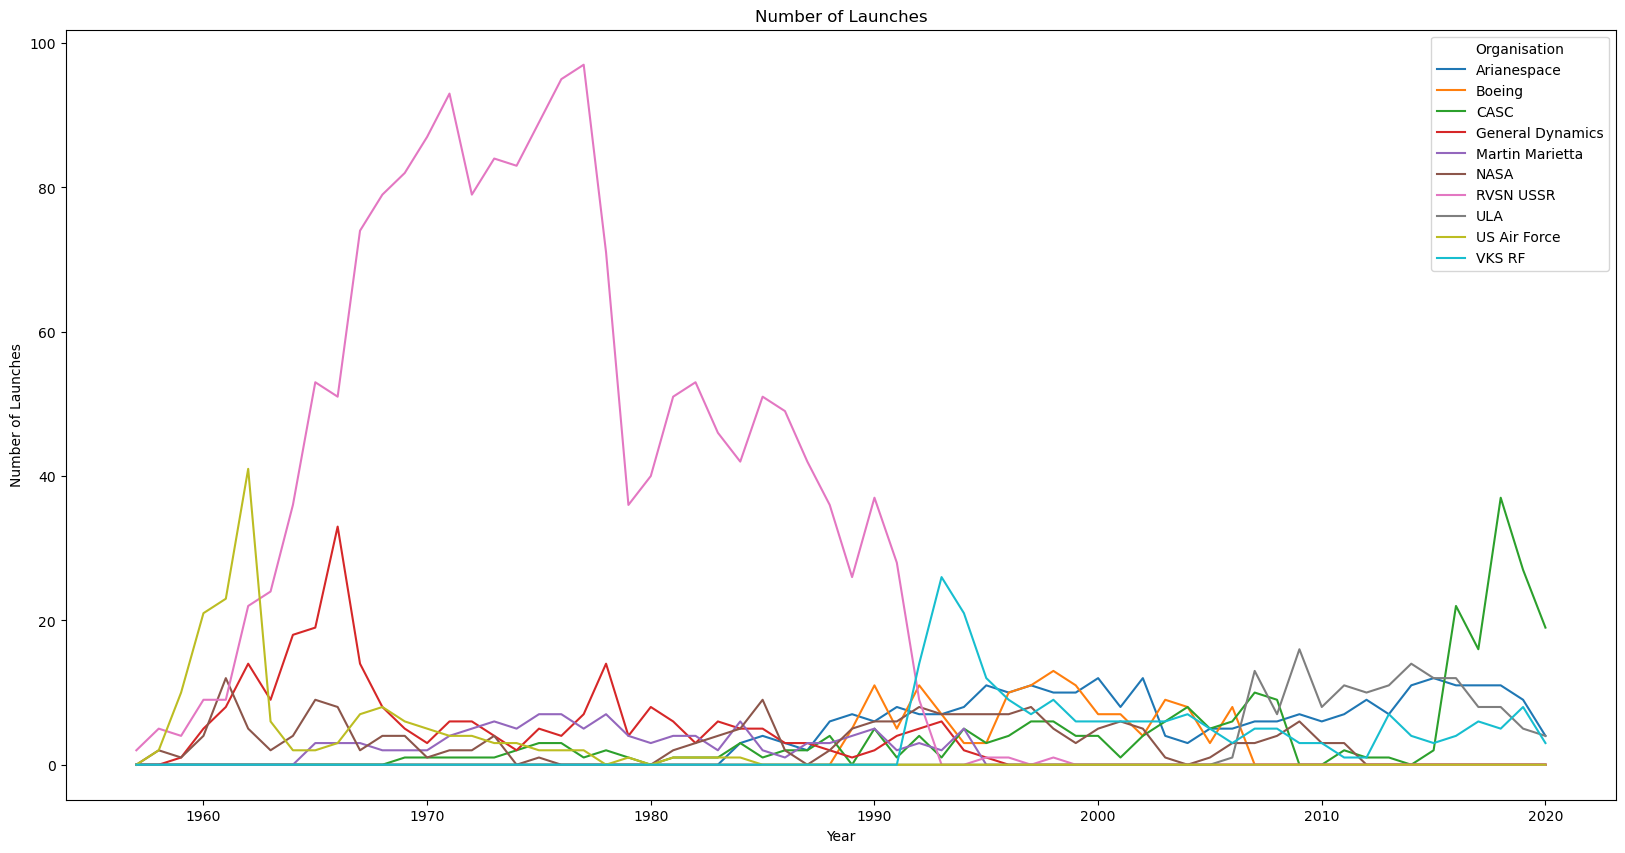

In [47]:
launches_top_10.plot(
    figsize=(20,10),
    title='Number of Launches'
)
plt.ylabel('Number of Launches')
plt.show()

In [48]:
##Space Race dominated by RVSN USSR after they outpaced the USAF in the early 1960s. However, Russian launches dropped off arounf 1990/fall of the USSR and have xsince been outpaced by American orgs like USAF and CASC.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [49]:
cold_war_data = cleaned_spacedata[cleaned_spacedata['Year'] <= 1991].sort_values('Year').reset_index(drop=True)

In [50]:
cold_war_data.shape

(2607, 9)

In [51]:
cold_war_data.head()

Organisation                                   Location  \
0    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
1    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
2      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
3         AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   

                       Date                      Detail  Rocket_Status  Price  \
0 1957-10-04 19:28:00+00:00  Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   
1 1957-11-03 02:30:00+00:00  Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
2 1957-12-06 16:44:00+00:00     Vanguard | Vanguard TV3  StatusRetired    NaN   
3 1958-02-01 03:48:00+00:00         Juno I | Explorer 1  StatusRetired    NaN   
4 1958-02-05 07:33:00+00:00   Vanguard | Vanguard TV3BU  StatusRetired    NaN   

  Mission_Status Country  Year  
0        Success     KAZ  1957  
1        Success     KAZ  1957  
2        Failure     USA  1957  
3        Success     USA  1958  
4        Failure     USA  1958

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [52]:
superpowers = cold_war_data[cold_war_data['Country'].isin(['RUS','USA'])]
superpowers

Organisation                                    Location  \
2         US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
3            AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4         US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
5            NASA   SLC-17A, Cape Canaveral AFS, Florida, USA   
6         US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
...           ...                                         ...   
2601    RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   
2603    RVSN USSR      Site 43/4, Plesetsk Cosmodrome, Russia   
2604         NASA  LC-39A, Kennedy Space Center, Florida, USA   
2605    RVSN USSR     Site 133/3, Plesetsk Cosmodrome, Russia   
2606         NASA  LC-39A, Kennedy Space Center, Florida, USA   

                          Date                                    Detail  \
2    1957-12-06 16:44:00+00:00                   Vanguard | Vanguard TV3   
3    1958-02-01 03:48:00+00:00                       Juno I | Explorer 1   
4    1958-02-05 07:33:00+00:00                 Vanguard | Vanguard TV3BU   
5    1958-10-11 08:42:00+00:00             Thor-DM 18 Able I | Pioneer 1   
6    1958-09-26 15:38:00+00:00                 Vanguard | Vanguard SLV-3   
...                        ...                                       ...   
2601 1991-09-28 07:05:00+00:00           Tsyklon-3 | Cosmos 2157 to 2162   
2603 1991-09-17 20:01:00+00:00    Molniya-M /Block ML | Molniya-3 n†­151   
2604 1991-09-12 23:11:00+00:00          Space Shuttle Discovery | STS-48   
2605 1991-02-12 02:44:00+00:00  Cosmos-3M (11K65M) | Cosmos 2125 to 2132   
2606 1991-11-24 23:44:00+00:00           Space Shuttle Atlantis | STS-44   

      Rocket_Status  Price   Mission_Status Country  Year  
2     StatusRetired    NaN          Failure     USA  1957  
3     StatusRetired    NaN          Success     USA  1958  
4     StatusRetired    NaN          Failure     USA  1958  
5     StatusRetired    NaN  Partial Failure     USA  1958  
6     StatusRetired    NaN          Failure     USA  1958  
...             ...    ...              ...     ...   ...  
2601  StatusRetired    NaN          Success     RUS  1991  
2603  StatusRetired    NaN          Success     RUS  1991  
2604  StatusRetired 450.00          Success     USA  1991  
2605  StatusRetired    NaN          Success     RUS  1991  
2606  StatusRetired 450.00          Success     USA  1991  

[1850 rows x 9 columns]

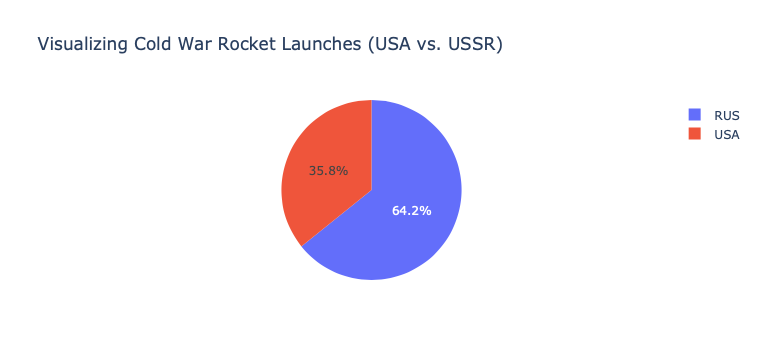

In [53]:
px.pie(
    title= 'Visualizing Cold War Rocket Launches (USA vs. USSR)',
    values= superpowers['Country'].value_counts(),
    names = superpowers['Country'].value_counts().index
)


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [54]:
cold_war_by_years = superpowers.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
cold_war_by_years

Country   RUS   USA
Year               
1957      NaN  1.00
1958      NaN 23.00
1959      NaN 16.00
1960      NaN 30.00
1961     2.00 43.00
1962     8.00 60.00
1963     8.00 17.00
1964     8.00 24.00
1965    10.00 33.00
1966    15.00 47.00
1967    37.00 26.00
1968    40.00 22.00
1969    45.00 17.00
1970    59.00 11.00
1971    62.00 16.00
1972    57.00 17.00
1973    67.00 17.00
1974    60.00 10.00
1975    66.00 15.00
1976    66.00 13.00
1977    72.00 14.00
1978    62.00 21.00
1979    33.00  9.00
1980    34.00 11.00
1981    41.00 13.00
1982    43.00 11.00
1983    40.00 13.00
1984    38.00 17.00
1985    39.00 16.00
1986    42.00  6.00
1987    30.00  6.00
1988    27.00  7.00
1989    22.00 16.00
1990    30.00 26.00
1991    25.00 18.00

<Axes: title={'center': 'Total Cold War Launches by Year (USA v. USSR)'}, xlabel='Year'>

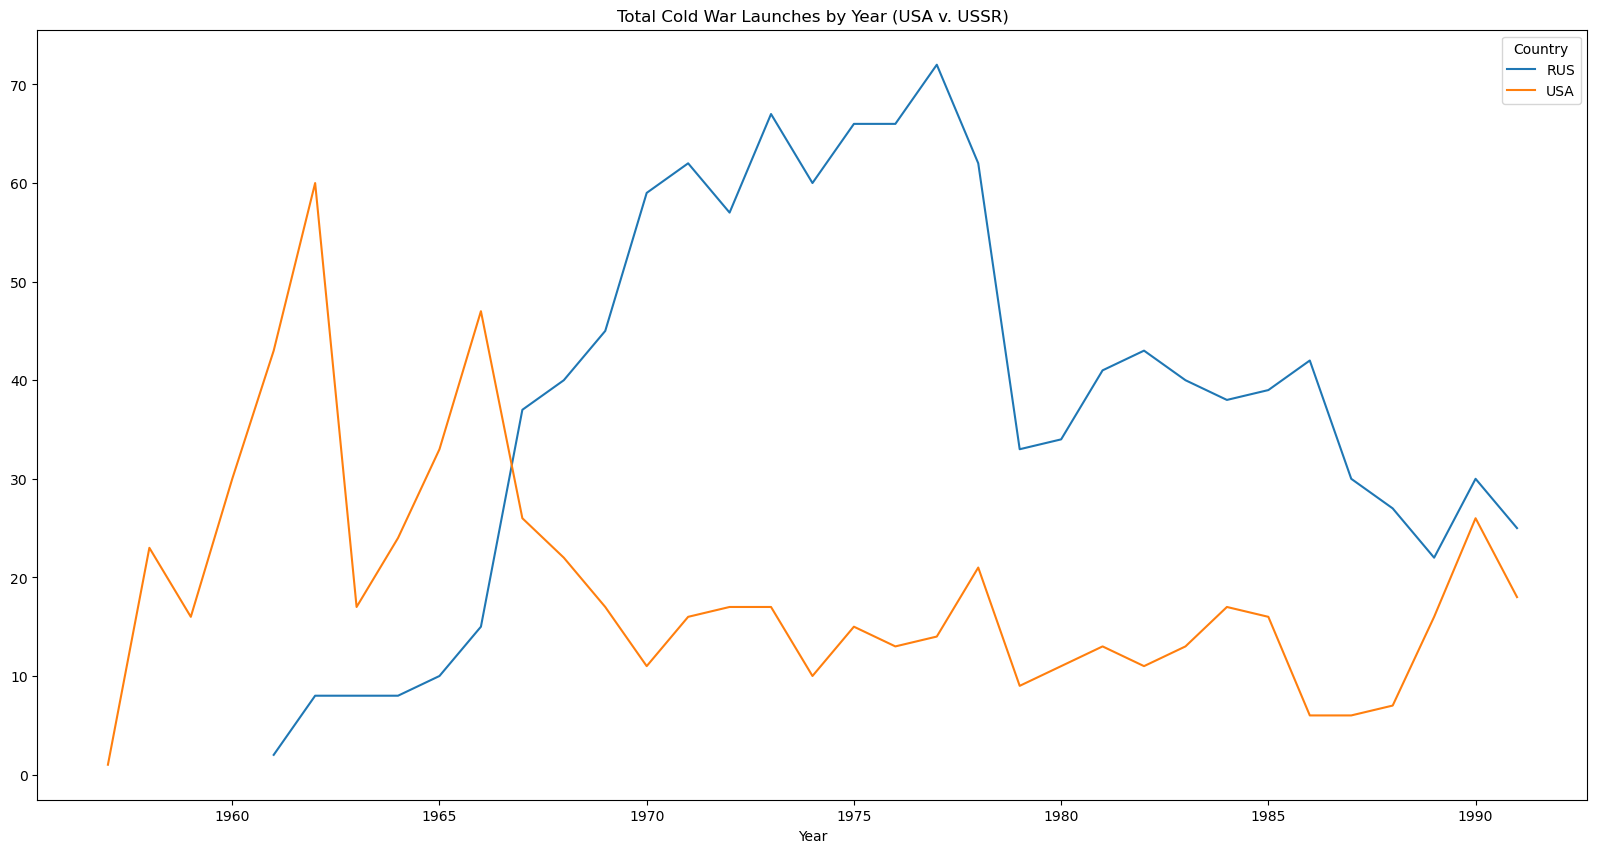

In [55]:
cold_war_by_years.plot(
    figsize=(20,10),
    title= 'Total Cold War Launches by Year (USA v. USSR)'
)

In [56]:
##USSR conducted more space launches/missions overall

## Chart the Total Number of Mission Failures Year on Year.

In [57]:
cold_war_mission_failures_by_year = superpowers[superpowers['Mission_Status']!='Success'].groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
cold_war_mission_failures_by_year.fillna(0, inplace=True)
cold_war_mission_failures_by_year

Country  RUS   USA
Year              
1957    0.00  1.00
1958    0.00 18.00
1959    0.00 10.00
1960    0.00 14.00
1961    2.00 16.00
1962    1.00 10.00
1963    4.00  4.00
1964    1.00  5.00
1965    3.00  7.00
1966    2.00  7.00
1967    4.00  5.00
1968    3.00  3.00
1969    5.00  0.00
1970    7.00  2.00
1971    8.00  2.00
1972    5.00  2.00
1973    3.00  1.00
1974    4.00  1.00
1975    2.00  3.00
1976    3.00  0.00
1977    1.00  1.00
1978    2.00  1.00
1980    3.00  2.00
1981    3.00  2.00
1982    3.00  0.00
1983    1.00  0.00
1984    1.00  1.00
1985    1.00  1.00
1986    3.00  2.00
1987    1.00  1.00
1988    0.00  1.00
1989    1.00  0.00
1990    1.00  1.00
1991    1.00  2.00

<Axes: title={'center': 'Total Failed Launces per year by Superpower'}, xlabel='Year'>

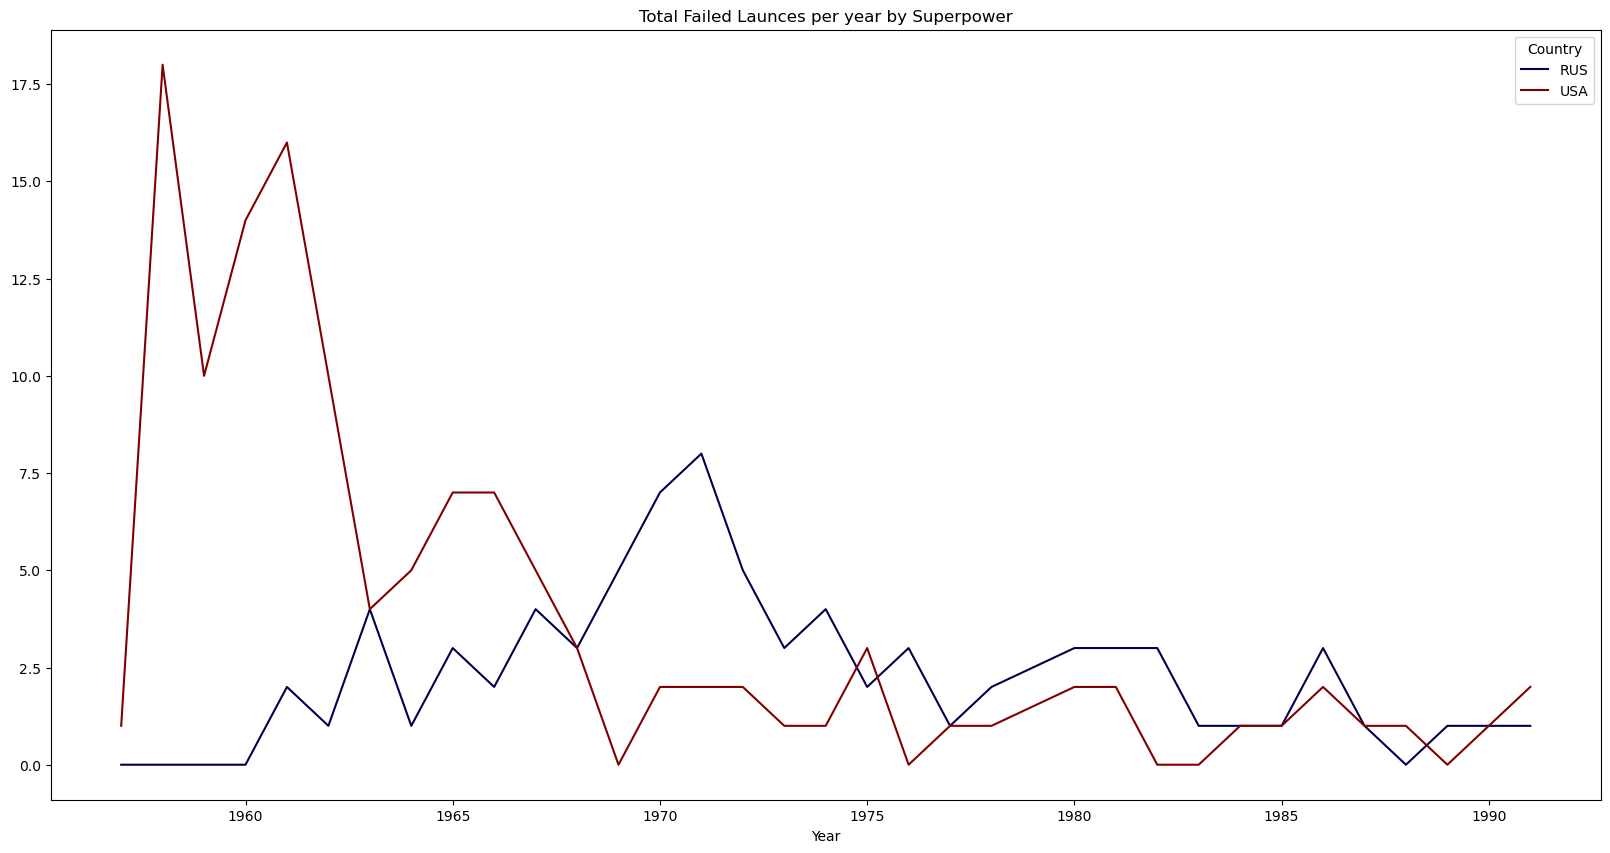

In [58]:
cold_war_mission_failures_by_year.plot(
    figsize=(20,10),
    title = 'Total Failed Launces per year by Superpower',
    colormap='seismic'
)

In [59]:
##Some gaps because of multiple successes in succession. Total launches and total failures directly correlated for both countries.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [60]:
cold_war_failpct_by_year = cold_war_mission_failures_by_year/cold_war_by_years * 100
cold_war_failpct_by_year.fillna(0, inplace=True)
cold_war_failpct_by_year

Country    RUS    USA
Year                 
1957      0.00 100.00
1958      0.00  78.26
1959      0.00  62.50
1960      0.00  46.67
1961    100.00  37.21
1962     12.50  16.67
1963     50.00  23.53
1964     12.50  20.83
1965     30.00  21.21
1966     13.33  14.89
1967     10.81  19.23
1968      7.50  13.64
1969     11.11   0.00
1970     11.86  18.18
1971     12.90  12.50
1972      8.77  11.76
1973      4.48   5.88
1974      6.67  10.00
1975      3.03  20.00
1976      4.55   0.00
1977      1.39   7.14
1978      3.23   4.76
1979      0.00   0.00
1980      8.82  18.18
1981      7.32  15.38
1982      6.98   0.00
1983      2.50   0.00
1984      2.63   5.88
1985      2.56   6.25
1986      7.14  33.33
1987      3.33  16.67
1988      0.00  14.29
1989      4.55   0.00
1990      3.33   3.85
1991      4.00  11.11

<Axes: title={'center': 'Percent Failed Missions by Year (USA vs. USSR)'}, xlabel='Year'>

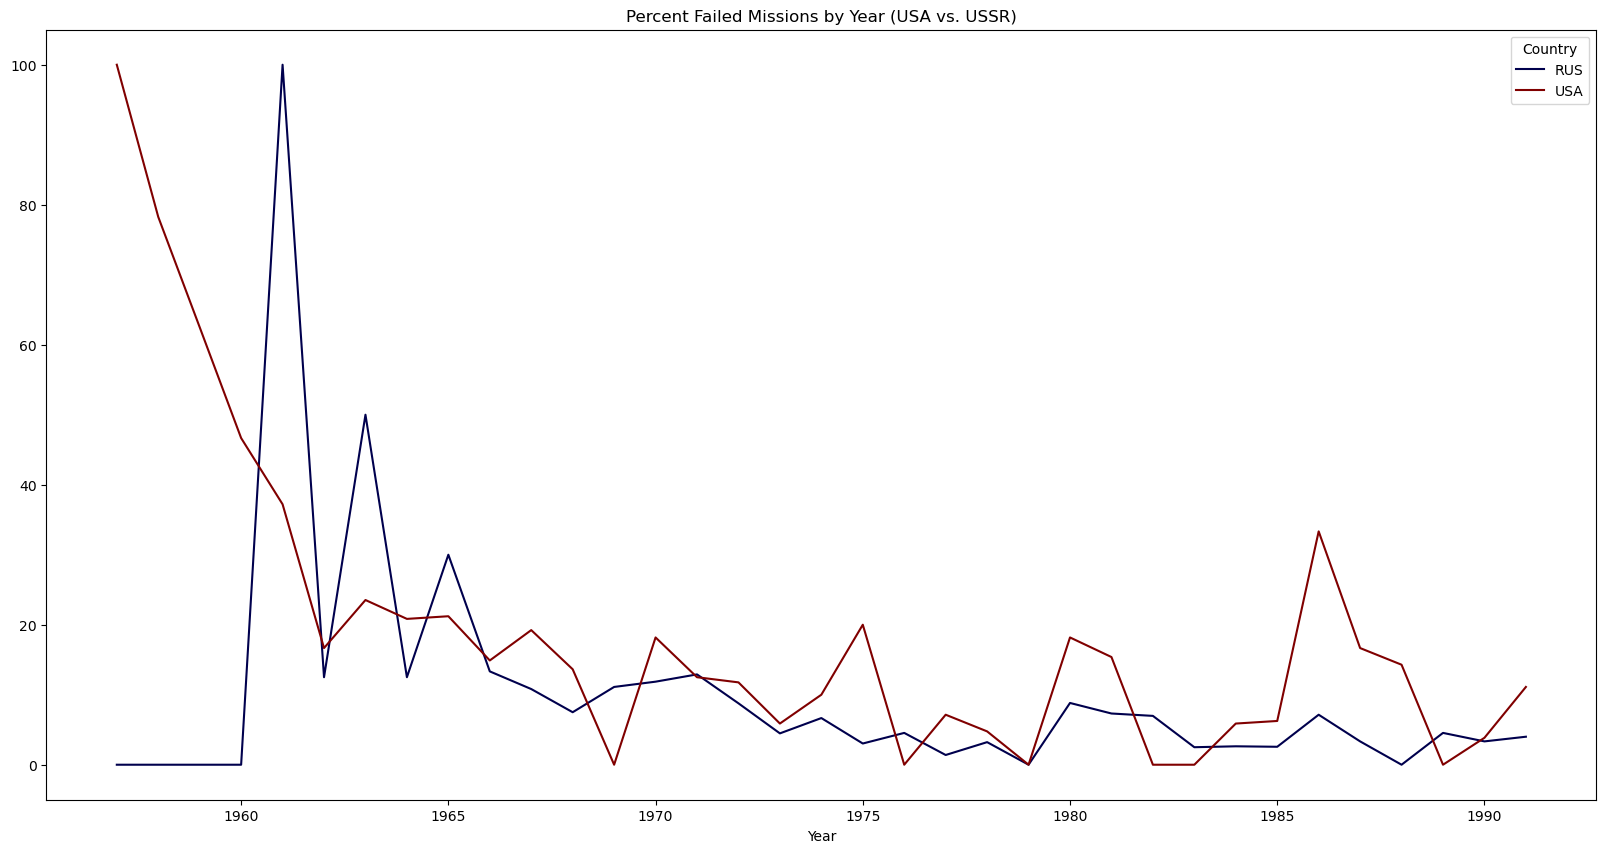

In [61]:
cold_war_failpct_by_year.plot(
    figsize = (20,10),
    title = 'Percent Failed Missions by Year (USA vs. USSR)',
    colormap='seismic'
)

In [62]:
##Mission success rates have improved over time. The most failures occured at the outset of the Cold War, with America having noticeable spikes in failures throughout the late 20th Century.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [63]:
launches_by_country_by_yr = cleaned_spacedata.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
launches_by_country_by_yr.fillna(0, inplace=True)
launches_by_country_by_yr

Country  AUS  BRA   CHN   FRA  IND  IRN  ISR  JPN   KAZ  KEN  KIR  KOR  NZL  \
Year                                                                          
1957    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  2.00 0.00 0.00 0.00 0.00   
1958    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  5.00 0.00 0.00 0.00 0.00   
1959    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  4.00 0.00 0.00 0.00 0.00   
1960    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  9.00 0.00 0.00 0.00 0.00   
1961    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  7.00 0.00 0.00 0.00 0.00   
...      ...  ...   ...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
2016    0.00 0.00 22.00 11.00 7.00 0.00 1.00 4.00 11.00 0.00 0.00 0.00 0.00   
2017    0.00 0.00 18.00 11.00 5.00 1.00 0.00 7.00 13.00 0.00 0.00 0.00 1.00   
2018    0.00 0.00 39.00 11.00 7.00 0.00 0.00 6.00  9.00 0.00 0.00 0.00 3.00   
2019    0.00 0.00 34.00  9.00 6.00 3.00 0.00 2.00 13.00 0.00 0.00 0.00 6.00   
2020    0.00 0.00 22.00  2.00 0.00 2.00 1.00 3.00  6.00 0.00 0.00 0.00 3.00   

Country  PRK  RUS   USA  
Year                     
1957    0.00 0.00  1.00  
1958    0.00 0.00 23.00  
1959    0.00 0.00 16.00  
1960    0.00 0.00 30.00  
1961    0.00 2.00 43.00  
...      ...  ...   ...  
2016    1.00 6.00 27.00  
2017    0.00 6.00 30.00  
2018    0.00 8.00 34.00  
2019    0.00 9.00 27.00  
2020    0.00 3.00 21.00  

[64 rows x 16 columns]

<Axes: title={'center': 'Launches by Country Each Year'}, xlabel='Year'>

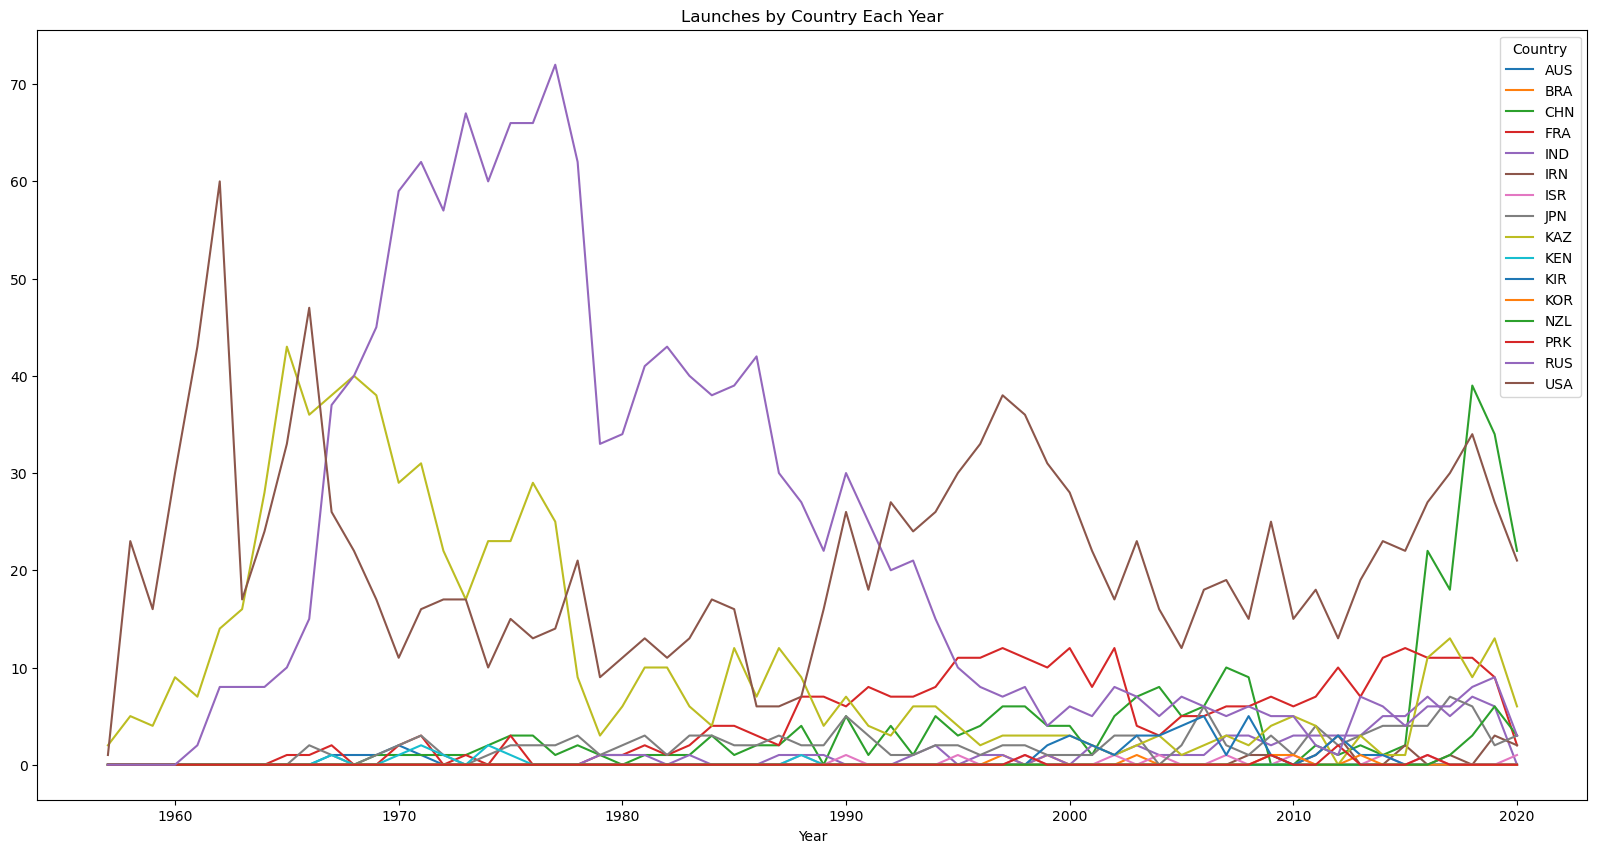

In [64]:
launches_by_country_by_yr.plot(
    title = 'Launches by Country Each Year',
    figsize = (20,10)
)


In [65]:
##USA had a strong start in the 50s, but was surpassed by the Soviet Union through the 60s onward, before tapering off around 1991.China and USA both picked their number of launches back up per year in the 2010s.
##China's big leap occured around 1995.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [66]:
launches_by_org_by_yr = cleaned_spacedata.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
launches_by_org_by_yr.fillna(0, inplace=True)
launches_by_org_by_yr

Organisation  AEB  AMBA  ASI  Arianespace  Arm??e de l'Air  Blue Origin  \
Year                                                                      
1957         0.00  0.00 0.00         0.00             0.00         0.00   
1958         0.00  7.00 0.00         0.00             0.00         0.00   
1959         0.00  0.00 0.00         0.00             0.00         0.00   
1960         0.00  0.00 0.00         0.00             0.00         0.00   
1961         0.00  0.00 0.00         0.00             0.00         0.00   
...           ...   ...  ...          ...              ...          ...   
2016         0.00  0.00 0.00        11.00             0.00         4.00   
2017         0.00  0.00 0.00        11.00             0.00         1.00   
2018         0.00  0.00 0.00        11.00             0.00         2.00   
2019         0.00  0.00 0.00         9.00             0.00         3.00   
2020         0.00  0.00 0.00         4.00             0.00         0.00   

Organisation  Boeing  CASC  CASIC  CECLES  ...  SpaceX  Starsem   ULA  \
Year                                       ...                          
1957            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1958            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1959            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1960            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1961            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
...              ...   ...    ...     ...  ...     ...      ...   ...   
2016            0.00 22.00   0.00    0.00  ...    9.00     0.00 12.00   
2017            0.00 16.00   1.00    0.00  ...   18.00     0.00  8.00   
2018            0.00 37.00   0.00    0.00  ...   21.00     0.00  8.00   
2019            0.00 27.00   0.00    0.00  ...   13.00     0.00  5.00   
2020            0.00 19.00   0.00    0.00  ...   14.00     0.00  4.00   

Organisation  US Air Force  US Navy   UT  VKS RF  Virgin Orbit  Yuzhmash  \
Year                                                                       
1957                  0.00     1.00 0.00    0.00          0.00      0.00   
1958                  2.00    12.00 0.00    0.00          0.00      0.00   
1959                 10.00     4.00 0.00    0.00          0.00      0.00   
1960                 21.00     0.00 0.00    0.00          0.00      0.00   
1961                 23.00     0.00 0.00    0.00          0.00      0.00   
...                    ...      ...  ...     ...           ...       ...   
2016                  0.00     0.00 0.00    4.00          0.00      0.00   
2017                  0.00     0.00 0.00    6.00          0.00      0.00   
2018                  0.00     0.00 0.00    5.00          0.00      0.00   
2019                  0.00     0.00 0.00    8.00          0.00      0.00   
2020                  0.00     0.00 0.00    3.00          1.00      0.00   

Organisation  i-Space  
Year                   
1957             0.00  
1958             0.00  
1959             0.00  
1960             0.00  
1961             0.00  
...               ...  
2016             0.00  
2017             0.00  
2018             0.00  
2019             1.00  
2020             0.00  

[64 rows x 56 columns]

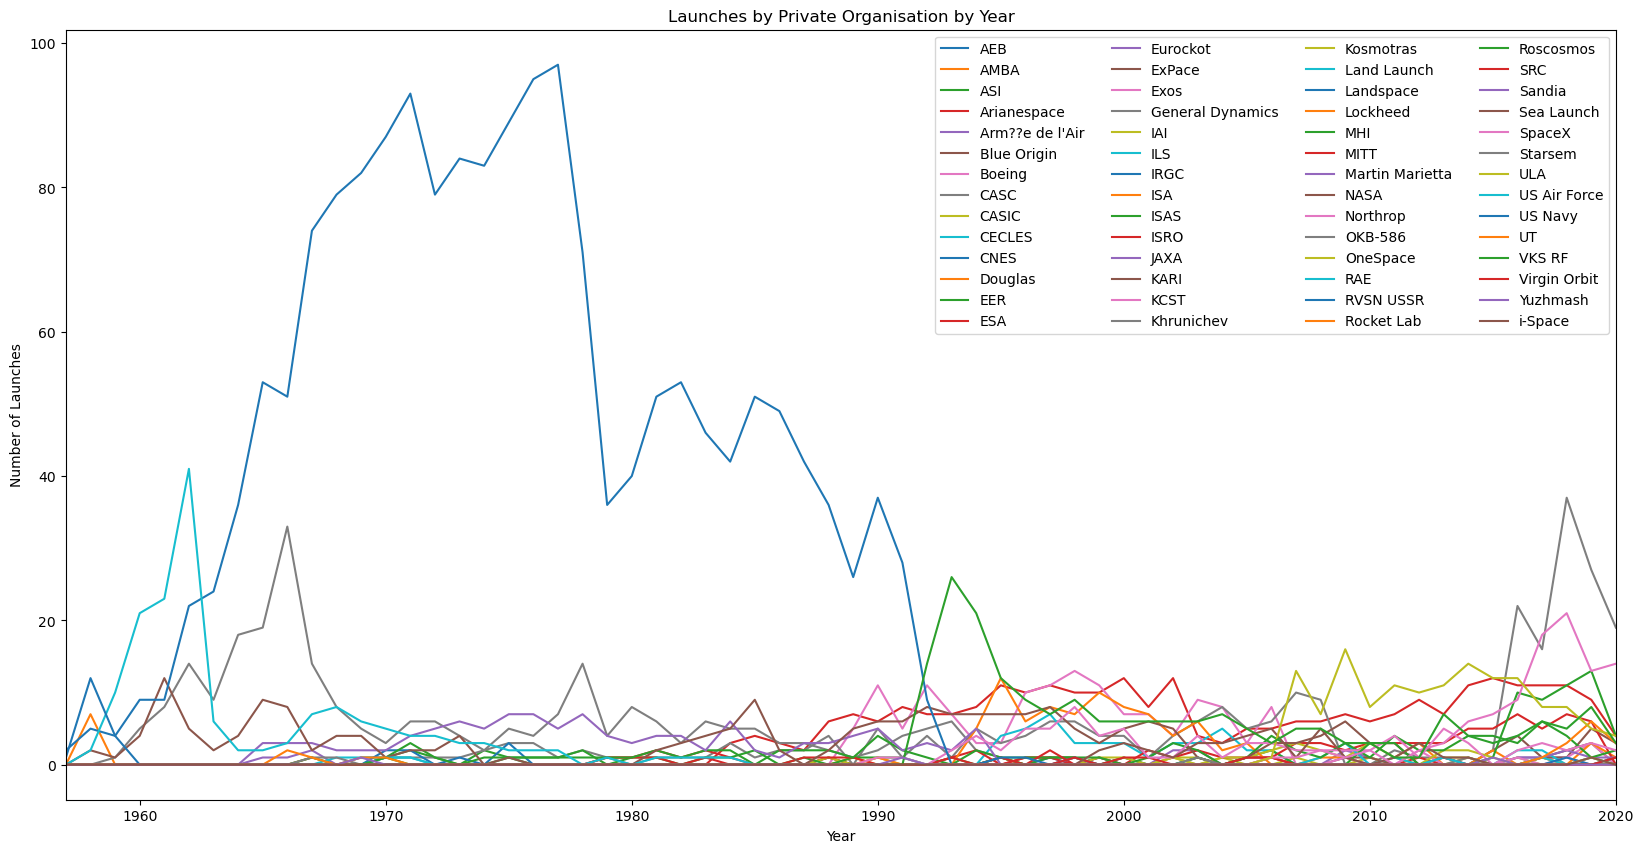

In [67]:
launches_by_org_by_yr.plot(
    title = 'Launches by Private Organisation by Year',
    figsize = (20,10)
)
plt.ylabel('Number of Launches')
plt.xlim(1957, 2020)
##^^ Year range
plt.legend(loc='upper right', ncol=4)
##^^Need to show in a place where lines won't get covered
plt.show()

In [68]:
##Brazilian space program AEB was dominant in terms of private orgs throughout the 70s and 80s.
##By 2018 onward, China's CASC was the leader.